In [170]:
import vk

In [171]:
from credentials import *

session = vk.AuthSession(id_app, login, password)

2018-03-04 18:18:56,591 vk    mixins:127 INFO: Getting permissions


In [172]:
session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)

2018-03-04 18:19:24,345 vk    mixins:127 INFO: Getting permissions


### Задание 1 

Скачиваем тексты из  групп (Факультатив по истории, Наука: это работает, джек-с-фонарем (стихи)).

In [251]:
hist_facult = hist_facult = vk_api.wall.get(owner_id=-87396564,v=5.73, count = 100, offset = 0) #группа с текстами о русской истории


In [176]:
print(hist_facult)

{'count': 251, 'items': [{'id': 1027, 'from_id': -87396564, 'owner_id': -87396564, 'date': 1519822253, 'marked_as_ads': 0, 'post_type': 'post', 'text': 'Морозы крепчают, поэтому субботнюю экскурсию "Северяне в Петербурге" мы благоразумно переносим на более теплые времена - ориентировочно на конец марта. Следите за анонсами! 😊', 'signer_id': 1071135, 'post_source': {'type': 'vk'}, 'comments': {'count': 0, 'groups_can_post': True, 'can_post': 0}, 'likes': {'count': 19, 'user_likes': 0, 'can_like': 1, 'can_publish': 1}, 'reposts': {'count': 1, 'user_reposted': 0}, 'views': {'count': 11046}}, {'id': 1026, 'from_id': -87396564, 'owner_id': -87396564, 'date': 1519670255, 'marked_as_ads': 0, 'post_type': 'post', 'text': 'Николай Второй не выговаривал букву ять. Буква фита считалась неприличной, потому что напоминала очертания человеческого зада. Разговор о реформе алфавита русские ученые завели еще во второй половине ХIX века, однако провели ее только большевики - и тут же оказались во всем в

In [177]:
reason_science = vk_api.wall.get(owner_id=-23637723,v=5.73, count = 100, offset = 0) #научно-популярные публикации и новости

In [178]:
#print(reason_science)

In [179]:
jackpoetry = vk_api.wall.get(owner_id=-48314753,v=5.73, count = 100, offset = 5) #стихи одного автора

In [180]:
#print(jackpoetry)

### Задача 2. Предобработка (15 баллов)

Предобработайте корпуса текстов:


In [181]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

In [189]:
import re
import pymorphy2 as pm
from stop_words import get_stop_words

In [190]:
stop_words = get_stop_words('ru')

In [191]:
morph = pm.MorphAnalyzer()
def words(str):
    nolinks = ' '.join([word for word in str.split() if (not re.findall('https?://|\w\.\w', word))])#удалили ссылки
    clean_line = re.sub('[\W\d_-]+', ' ', nolinks.lower().strip())
    ws = re.split(' +', clean_line)
    filtered_words = [word for word in ws if word not in stop_words]
    return [morph.parse(w)[0].normal_form for w in filtered_words]

texts_jack = Jack_df['text'] #прочитали тексты
jack_list = [' '.join(words(text)) for text in texts_jack] # список списков слов

In [192]:
jack_list[:3]

['тереть рубин пытаться высечь пламя возиться яростно непривычка последний волшебный камень жаль курить б спичка тридцать род ворчливый грозный сердце медведь гордый стать солдат впервые жизнь серьёзный становиться жутковатый вскоре костёр вздыматься словно скерцо тревожный зябко сдвинуть бровь огонь смотреть прямо сердце учить колдунья бабка ночь смыкать обьятие видеть костра мерцать картинка трон бел платье мальчик собирать льдинка леса девочка помогать роза зверь разбойник хотеть пробраться замок шмыгать нос утирать слеза смотреть вперёд отчаянный глаз собирать лагерь идти дорога тусклый рубин валяться сажа заявляться прямо порог снег ущелие замок стража снежный королева блестеть мороз скула бела ночь полярный парень сознать угроза стоять друг напротив друг дворец стихать ветер словно поток вода пустынь пойти заждаться ребёнок плюшка остыть пытаться улыбаться дышать рука растирать ухо идти сто знаешь сказка скучно прямо замок вести тропинка тепло август запах верба тронный зал кай с

In [193]:
history_df = pd.DataFrame(hist_facult["items"], columns = ['text'])
#print(history_df)

In [194]:
science_df = pd.DataFrame(reason_science["items"], columns = ['text'])
#print(science_df)

In [195]:
Jack_df = pd.DataFrame(jackpoetry["items"], columns = ['text'])
#print(Jack_df)

Создаем файлики с текстами

In [196]:
jackfile = open('jack.txt', 'w')

In [197]:
for item in jack_list:
   jackfile.write("%s\n" % item)

In [198]:
texts_history = history_df['text'] 
history_list = [' '.join(words(text)) for text in texts_history]

In [227]:
historyfile = open('hist.txt', 'w')

In [228]:
for item in history_list:
   historyfile.write("%s\n" % item)

In [200]:
texts_science = science_df['text'] 
science_list = [' '.join(words(text)) for text in texts_science]

In [235]:
sciencefile = open('science.txt', 'w')

In [236]:
for item in science_list:
    sciencefile.write("%s\n" % item)

### Задача 3. Выделение признаков (5 баллов)

Воспользуйтесь TfidfVectorizer для векторизации текстов.

Сначала нужно создать и обучить vectorizer:


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=<сюда передайте список стоп слов>).fit(<сюда передайте весь корпус текстов>)
Что бы преообразовать тексты в векторное представление используйте метод transform:

tfidf_vectors = vectorizer.transform(<список текстов>)
Получение списка имён признаков:

features_names = vectorizer.get_features_name()
Для каждой группы получите список топ-токенов и выведите .

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

Для стихов:

In [239]:
vectorizerJack = TfidfVectorizer(stop_words=stop_words).fit(jack_list)
tfidf_vectors_Jack = vectorizer.transform(jack_list) 
features_names_Jack = vectorizerJack.get_feature_names() 

C:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [240]:
print(len(features_names_Jack), 'features_names_Jack')
type(features_names_Jack)

4770 features_names_Jack


list

Топ частотных слов

In [206]:
from collections import Counter

In [284]:
def Words_counter(vk_posts):
    lines = vk_posts
    words = []
    for line in lines[6:]:
        clean_line = re.sub('[\W\d_-]+', ' ', line.lower().strip())
        line_words = re.split(' +', clean_line)
        words += [w for w in line_words if w]
    return words
    
jack_words = Words_counter(jack_list)

In [285]:
#jack_words

In [286]:
#создаем словарь частности
freq = {}
for w in jack_words:
    if w not in freq:
        freq[w] = 1
    else:
        freq[w] += 1
jack_wordf = list(freq.items())

In [287]:
jack_wordf[:5]

[('письмо', 8),
 ('начать', 11),
 ('привет', 4),
 ('здравствовать', 1),
 ('слово', 37)]

In [289]:
sorted_jack_wordf = sorted(jack_wordf, key=lambda x: x[1], reverse=True)
sorted_jack_wordf[:20]

[('мир', 81),
 ('знать', 60),
 ('ветер', 59),
 ('город', 56),
 ('бежать', 50),
 ('рука', 49),
 ('твой', 47),
 ('небо', 47),
 ('сердце', 47),
 ('друг', 45),
 ('идти', 45),
 ('стать', 43),
 ('ждать', 40),
 ('видеть', 40),
 ('каждый', 40),
 ('рэм', 40),
 ('дорога', 39),
 ('слово', 37),
 ('дом', 36),
 ('глаз', 36)]

То же самое для тестов по русской истории:

In [212]:
vectorizerHist = TfidfVectorizer(stop_words=stop_words).fit(history_list)
tfidf_vectors_Hist = vectorizer.transform(history_list) 
features_names_Hist = vectorizerHist.get_feature_names() 
print(len(features_names_Hist), 'features_names_Hist')


5431 features_names_Hist


C:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [213]:
hist_words = Words_counter(history_list)
#hist_words

In [214]:
freq = {}
for w in hist_words:
    if w not in freq:
        freq[w] = 1
    else:
        freq[w] += 1
hist_wordsf = list(freq.items())

In [215]:
#hist_wordsf[:5]

In [216]:
sorted_hist_wordsf = sorted(hist_wordsf, key=lambda x: x[1], reverse=True)
sorted_hist_wordsf[:20]

[('дело', 53),
 ('один', 52),
 ('друг', 50),
 ('корабль', 48),
 ('знать', 47),
 ('дом', 45),
 ('писать', 40),
 ('какой', 38),
 ('вообще', 35),
 ('никто', 34),
 ('книга', 33),
 ('например', 33),
 ('жить', 30),
 ('идти', 30),
 ('человек', 30),
 ('хороший', 29),
 ('деньга', 28),
 ('стать', 27),
 ('взять', 25),
 ('бог', 25)]

Для научно-популярных текстов

In [217]:
vectorizerScience = TfidfVectorizer(stop_words=stop_words).fit(science_list)
tfidf_vectors_Science = vectorizer.transform(science_list) 
features_names_Science = vectorizerScience.get_feature_names() 
print(len(features_names_Science), 'features_names_Science')

2015 features_names_Science


C:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [218]:
science_words = Words_counter(science_list)
#science_words
freq = {}
for w in science_words:
    if w not in freq:
        freq[w] = 1
    else:
        freq[w] += 1
science_wordsf = list(freq.items())

sorted_science_wordsf = sorted(science_wordsf, key=lambda x: x[1], reverse=True)
sorted_science_wordsf[:20]

[('наука', 29),
 ('наш', 24),
 ('какой', 19),
 ('club', 18),
 ('научный', 18),
 ('самый', 15),
 ('лекция', 15),
 ('земля', 15),
 ('вселенная', 15),
 ('март', 13),
 ('исследование', 13),
 ('человек', 13),
 ('центр', 12),
 ('история', 12),
 ('жизнь', 12),
 ('научно', 11),
 ('учёный', 11),
 ('один', 11),
 ('теория', 11),
 ('принцип', 11)]

### Задача 4. Визуализация (5 баллов)

Визуализируйте токены для каждого сообщества с помощью WORDCLOUD

In [219]:
from os import path
from wordcloud import WordCloud

Для стихов

In [220]:
jack_dir = path.dirname('jack.txt')
jack_text = open(path.join(jack_dir, 'jack.txt')).read()

In [221]:
jack_wordcloud = WordCloud().generate(jack_text)

In [222]:
import matplotlib.pyplot as plt
plt.imshow(jack_wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

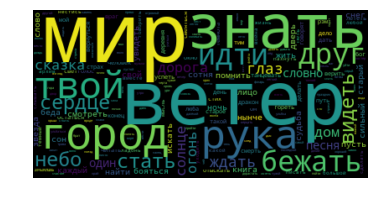

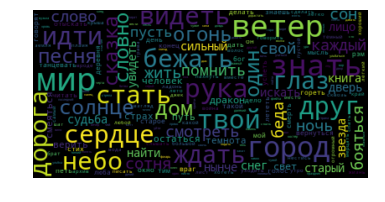

In [223]:
jack_Wordcloud = WordCloud(max_font_size=40).generate(jack_text)
plt.figure()
plt.imshow(jack_Wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Для текстов по истории

In [229]:
hist_dir = path.dirname('hist.txt')
history_text = open(path.join(hist_dir, 'hist.txt')).read()
hist_wordcloud = WordCloud().generate(history_text)

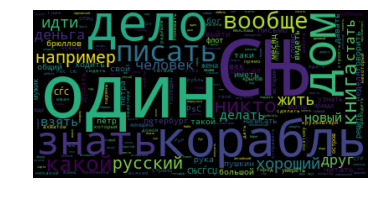

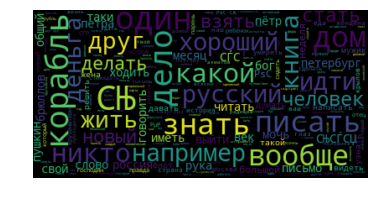

In [230]:
plt.imshow(hist_wordcloud, interpolation='bilinear')
plt.axis("off")
hist_Wordcloud = WordCloud(max_font_size=40).generate(history_text)
plt.figure()
plt.imshow(hist_Wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Для текстов о науке:

In [237]:
science_dir = path.dirname('science.txt')
science_text = open(path.join(science_dir, 'science.txt')).read()
science_wordcloud = WordCloud().generate(science_text)

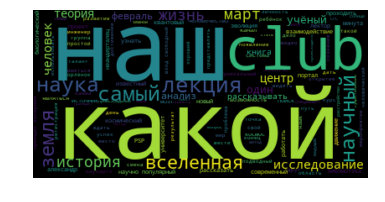

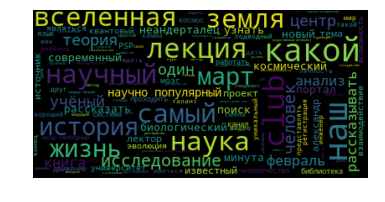

In [238]:
plt.imshow(science_wordcloud, interpolation='bilinear')
plt.axis("off")
science_Wordcloud = WordCloud(max_font_size=40).generate(science_text)
plt.figure()
plt.imshow(science_Wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Задача 5. Поиск коллокаций (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI

In [260]:
import nltk
from nltk.collocations import *
from nltk.tokenize import word_tokenize

In [261]:
jack_string = ''.join(jack_list)

In [264]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(jack_string))
bigrams_jack = finder.score_ngrams(bigram_measures.pmi)

In [271]:
bigrams_jack_sorted = sorted(bigrams_jack, key=lambda x: x[1], reverse=False)

In [272]:
bigrams_jack_sorted #судя по всему, данная функция nltk присваивает наименьшее значение самым частым словосочетанием (те, которые получили 13, встречаются крайне редко)

[(('мир', 'мир'), 1.318859105968654),
 (('мир', 'рука'), 1.9403474827149232),
 (('твой', 'мир'), 2.0260773567408066),
 (('мир', 'друг'), 2.0861983491783764),
 (('видеть', 'мир'), 2.117225244799002),
 (('мир', 'каждый'), 2.2832351962379303),
 (('знать', 'идти'), 2.3130100302719665),
 (('мир', 'словно'), 2.3928596874124306),
 (('город', 'бежать'), 2.404294582474712),
 (('огонь', 'мир'), 2.470862199413702),
 (('сердце', 'рука'), 2.480915864077625),
 (('рука', 'рука'), 2.5618358594611923),
 (('жить', 'мир'), 2.5963930814975615),
 (('мир', 'жить'), 2.5963930814975615),
 (('сотня', 'мир'), 2.5963930814975615),
 (('ветер', 'слово'), 2.6329189575226746),
 (('рука', 'твой'), 2.6475657334870775),
 (('ждать', 'знать'), 2.663507277356098),
 (('мир', 'смеяться'), 2.686590890469141),
 (('смеяться', 'мир'), 2.686590890469141),
 (('знать', 'слово'), 2.700033153381213),
 (('сказка', 'ветер'), 2.708867810755974),
 (('небо', 'твой'), 2.733295607512961),
 (('мир', 'искать'), 2.7338966052474962),
 (('рука'

In [273]:
hist_string = ''.join(history_list)
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(hist_string))
bigrams_hist = finder.score_ngrams(bigram_measures.pmi)
bigrams_hist_sorted = sorted(bigrams_hist, key=lambda x: x[1], reverse=False)
bigrams_hist_sorted

[(('дело', 'дело'), 2.126771542140622),
 (('один', 'дело'), 2.15425227856273),
 (('знать', 'дело'), 2.300103145026183),
 (('друг', 'знать'), 2.3275838814482928),
 (('дело', 'дом'), 2.362838900374147),
 (('знать', 'знать'), 2.473434747911746),
 (('дело', 'писать'), 2.4971399920857387),
 (('дом', 'знать'), 2.5361705032597097),
 (('знать', 'дом'), 2.5361705032597097),
 (('один', 'какой'), 2.5967705142636817),
 (('дом', 'дом'), 2.5989062586076717),
 (('вообще', 'дело'), 2.6452386310748714),
 (('какой', 'корабль'), 2.7122477316836164),
 (('никто', 'друг'), 2.7528897161809613),
 (('корабль', 'вообще'), 2.788196584916914),
 (('дом', 'какой'), 2.8053571360750986),
 (('например', 'дело'), 2.810297877345368),
 (('вообще', 'знать'), 2.8185702339604326),
 (('например', 'один'), 2.8377786137674743),
 (('корабль', 'никто'), 2.868366933600898),
 (('знать', 'никто'), 2.8987405826444164),
 (('друг', 'идти'), 2.975282137517409),
 (('один', 'хороший'), 2.975282137517409),
 (('хороший', 'друг'), 2.9752821

In [274]:
science_string = ''.join(science_list)
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(science_string))
bigrams_science = finder.score_ngrams(bigram_measures.pmi)
bigrams_science_sorted = sorted(bigrams_science, key=lambda x: x[1], reverse=False)
bigrams_science_sorted

[(('наука', 'club'), 2.8202735312619254),
 (('история', 'наука'), 3.2897588145631467),
 (('club', 'научный'), 3.4052360319830814),
 (('вселенная', 'наш'), 3.4052360319830814),
 (('наука', 'исследование'), 3.4052360319830814),
 (('наш', 'вселенная'), 3.4052360319830814),
 (('лекция', 'club'), 3.639701285620106),
 (('человек', 'наш'), 3.727164126870445),
 (('наука', 'рассказать'), 3.8202735312619254),
 (('земля', 'лекция'), 3.9027356914538993),
 (('какой', 'исследование'), 3.9901985327042384),
 (('наука', 'проект'), 3.9901985327042384),
 (('научный', 'центр'), 3.9901985327042384),
 (('март', 'club'), 4.026724408729352),
 (('вселенная', 'земля'), 4.08330793709572),
 (('земля', 'вселенная'), 4.08330793709572),
 (('жизнь', 'вселенная'), 4.289758814563146),
 (('жизнь', 'земля'), 4.289758814563146),
 (('эволюция', 'наш'), 4.312126627591601),
 (('лекция', 'александр'), 4.35019466842512),
 (('один', 'лекция'), 4.35019466842512),
 (('какой', 'новый'), 4.405236031983082),
 (('научный', 'поиск'), 